# Instructor Do: Random Forests

In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

# Install
!pip install xgboost
# Import
import xgboost as xgb

## Loading and Preprocessing Loans Encoded Data

In [3]:
# Loading data
cardio_df = pd.read_csv("/content/Data/clean_cardio_data.csv")
cardio_df = cardio_df.drop(columns = ['Unnamed: 0'])
cardio_df.head()

,gender,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,Elevated,Hypertension Stage 1,Hypertension Stage 2,Normal
0,2,1,1,0,0,1,0,4,1,0,1,0,0
1,1,3,1,0,0,1,1,5,3,0,0,1,0
2,1,3,1,0,0,0,1,4,1,0,1,0,0
3,2,1,1,0,0,1,1,3,2,0,0,1,0
4,1,2,2,0,0,0,0,6,2,0,1,0,0


In [4]:
# Define features set
X = cardio_df.copy()
X.drop("cardio", axis=1, inplace=True)
X.head()

,gender,cholesterol,gluc,smoke,alco,active,age_years,bmi,Elevated,Hypertension Stage 1,Hypertension Stage 2,Normal
0,2,1,1,0,0,1,4,1,0,1,0,0
1,1,3,1,0,0,1,5,3,0,0,1,0
2,1,3,1,0,0,0,4,1,0,1,0,0
3,2,1,1,0,0,1,3,2,0,0,1,0
4,1,2,2,0,0,0,6,2,0,1,0,0


In [5]:
# Define target vector
#y = cardio_df["cardio"].ravel()
y = cardio_df["cardio"]
y[:5]

0    0
1    1
2    1
3    1
4    0
Name: cardio, dtype: int64

In [6]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [9]:
# XGBoost (different learning rate)
import numpy as np

learning_rate_range = np.arange(0.01, 1, 0.05)
test_XG = []
train_XG = []
for lr in learning_rate_range:
    xgb_classifier = xgb.XGBClassifier(eta = lr)
    xgb_classifier.fit(X_train, y_train)
    train_XG.append(xgb_classifier.score(X_train, y_train))
    test_XG.append(xgb_classifier.score(X_test, y_test))

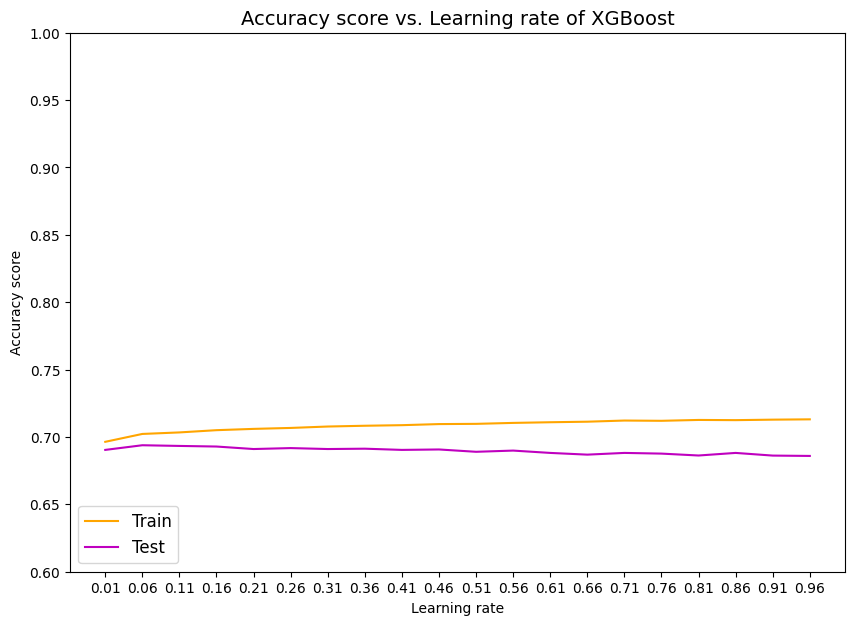

In [11]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 7))
plt.plot(learning_rate_range, train_XG, c='orange', label='Train')
plt.plot(learning_rate_range, test_XG, c='m', label='Test')
plt.xlabel('Learning rate')
plt.xticks(learning_rate_range)
plt.ylabel('Accuracy score')
plt.ylim(0.6, 1)
plt.legend(prop={'size': 12}, loc=3)
plt.title('Accuracy score vs. Learning rate of XGBoost', size=14)
plt.show()

**Model Evaluation**

In [13]:
# evaluate predictions
predictions = xgb_classifier.predict(X_test)
print("Accuracy of Model::",accuracy_score(y_test,predictions))


Accuracy of Model:: 0.6859282011902477


In [14]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [15]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,5902,1965
Actual 1,2943,4817


Accuracy Score : 0.6859282011902477
Classification Report
              precision    recall  f1-score   support

           0       0.67      0.75      0.71      7867
           1       0.71      0.62      0.66      7760

    accuracy                           0.69     15627
   macro avg       0.69      0.69      0.68     15627
weighted avg       0.69      0.69      0.68     15627

